In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [245]:
from collections import Counter

In [672]:
df_time_large = pd.read_csv('./bin/10_2_time_result.csv')

In [457]:
df_time_large

,Replicate,Gene_tree,reconcILSTime_iterative,reconcILSTime_recurssive,dlcparTime,ete_time
0,0,"(A,((D,D),C));",0.694421,0.528884,2.043826,0.072885
1,1,"(((((D,D),((B,B),C)),A),D),B);",7.670871,5.208552,2.683637,0.154124
2,3,"(((C,C),C),((((F,F),(E,F)),(A,D)),(((C,A),D),(...",17.956583,11.328842,2.563660,0.309044
3,4,"(B,(E,F));",0.214969,0.237502,2.248419,0.022143
4,5,"(F,E);",0.096866,0.098703,2.241954,0.010437
...,...,...,...,...,...,...
929,995,"(((((A,C),A),(B,D)),C),(F,E));",4.161649,4.596160,1.930349,0.137204
930,996,"((A,(C,B)),(F,E));",0.306780,0.301615,1.838027,0.029885
931,997,"(((E,F),F),((D,B),A));",1.874919,0.766999,1.775022,0.072924
932,998,"(((B,B),C),D);",0.460727,0.447393,1.554573,0.235062


In [273]:
pd.options.mode.chained_assignment = None
df_time_it_large= pd.DataFrame(df_time_large['reconcILSTime_iterative']).rename(columns={"reconcILSTime_iterative": "Time"})

val=['reconcILSTime_iterative' for i in range(934)]

df_time_it_large.insert(1, "Process", val, True)
df_time_it_large=pd.DataFrame(df_time_it_large)


df_time_re_large= pd.DataFrame(df_time_large['reconcILSTime_recurssive']).rename(columns={"reconcILSTime_recurssive": "Time"})
val=['reconcILSTime_recurssive' for i in range(934)]
df_time_re_large['Process']=val

df_time_dl_large= pd.DataFrame(df_time_large['dlcparTime']).rename(columns={"dlcparTime": "Time"})
val=['dlcparTime' for i in range(934)]


df_time_dl_large['Process']=val
pd1_large =pd.concat([df_time_it_large,df_time_re_large,df_time_dl_large],axis=0)

In [274]:
df_time = pd.read_csv('./bin/10_2_time_result.csv')

In [275]:
pd.options.mode.chained_assignment = None
df_time_it= pd.DataFrame(df_time['reconcILSTime_iterative']).rename(columns={"reconcILSTime_iterative": "Time"})

val=['reconcILSTime_iterative' for i in range(820)]

df_time_it.insert(1, "Process", val, True)
df_time_it=pd.DataFrame(df_time_it)


df_time_re= pd.DataFrame(df_time['reconcILSTime_recurssive']).rename(columns={"reconcILSTime_recurssive": "Time"})
val=['reconcILSTime_recurssive' for i in range(820)]
df_time_re['Process']=val

df_time_dl= pd.DataFrame(df_time['dlcparTime']).rename(columns={"dlcparTime": "Time"})
val=['dlcparTime' for i in range(820)]


df_time_dl['Process']=val
pd1 =pd.concat([df_time_it,df_time_re,df_time_dl],axis=0)

ValueError: Length of values (820) does not match length of index (812)

,Time,Process
0,0.319124,reconcILSTime_iterative
1,4.429877,reconcILSTime_iterative
2,7.711681,reconcILSTime_iterative
3,0.163990,reconcILSTime_iterative
4,0.027822,reconcILSTime_iterative
...,...,...
929,1.330379,dlcparTime
930,0.939456,dlcparTime
931,0.967623,dlcparTime
932,1.298127,dlcparTime


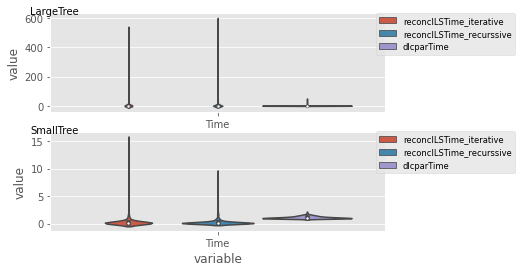

In [241]:
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
# Create some data
data = {
    "Large": pd1_large,
    "Small": pd1,
    
}

# Create a figure and axes
fig, axis = plt.subplots(2)

# Plot the box plots
i=0
for category, values in data.items():
    sns.violinplot(x="variable", y="value",hue="Process", data=pd.melt(values, id_vars =['Process']),ax=axis[i])
    plt.rc('legend',fontsize='small')
    axis[i].legend(bbox_to_anchor=(1.4, 1.05))

    trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
    axis[i].text(0.0, 1.0, category+'Tree', transform=axis[i].transAxes + trans,
            fontsize='medium', va='top')
    i=i+1

# Set the title and labels

# Show the plot
plt.show()

<AxesSubplot:xlabel='variable', ylabel='value'>

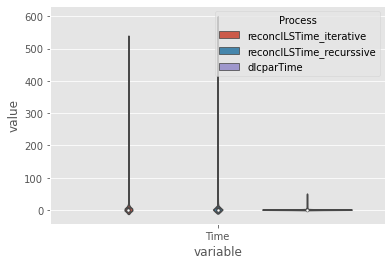

In [160]:
sns.violinplot(x="variable", y="value",hue="Process", data=pd.melt(pd1, id_vars =['Process']))


In [149]:
df_time_high_ILS = pd.read_csv('./bin/10_3_high_ILS_time_result.csv')


In [460]:
df_time_large[['reconcILSTime_recurssive','ete_time','dlcparTime']].mean()

reconcILSTime_iterative     8.659189
reconcILSTime_recurssive    6.686237
ete_time                    0.082306
dlcparTime                  2.470480
dtype: float64

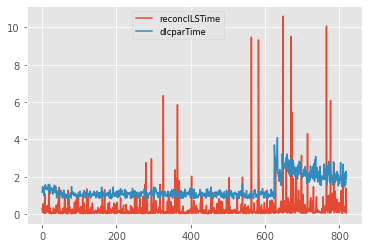

In [673]:
df_time_large[['reconcILSTime_recurssive','dlcparTime']].rename(columns={'reconcILSTime_recurssive': 'reconcILSTime'}).plot()
plt.savefig('small_tree_time.png')
plt.legend(bbox_to_anchor=(0.6,1))

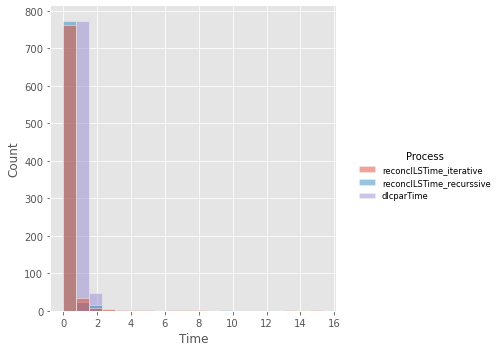

In [459]:
pd1 = pd1.reset_index()

sns.displot(pd1, x="Time",hue='Process', bins=20)


In [75]:
df_time[['reconcILSTime_iterative','reconcILSTime_recurssive','dlcparTime']].mean()

reconcILSTime_iterative     4.274916
reconcILSTime_recurssive    3.291324
dlcparTime                  1.354905
dtype: float64

<AxesSubplot:>

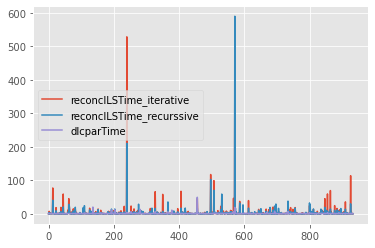

In [74]:
df_time[['reconcILSTime_iterative','reconcILSTime_recurssive','dlcparTime']].plot()

In [66]:
df_time =df_time[df_time.reconcILSTime_iterative<100]

In [ ]:
df_diff_D = df_time[df_time['dlcparTime']<df_time['reconcILSTime']].fillna('')
df_diff_D

In [99]:
df_diff_D[(df_diff_D.reconcILSTime >100)]['Gene_tree']

Series([], Name: Gene_tree, dtype: object)

In [651]:
df = pd.read_csv('./bin/10_2_large_result.csv')

In [652]:
df

,Process,Replicate,Gene_tree,Species_Tree,Duplication,NNI,DLCILS,Loss,Hemiplasy,RHemiplasy
0,True Process,0,"(A,((D,D),C));","(((A,(B,C)),D),(E,F));",1,2,1,2,0,2
1,DLCpar,0,"(A,((D,D),C));","(((A,(B,C)),D),(E,F));",1,0,1,1,0,0
2,ETE3,0,"(A,((D,D),C));","(((A,(B,C)),D),(E,F));",2,0,0,5,0,0
3,Our_algorithm_ite,0,"(A,((D,D),C));","(((A,(B,C)),D),(E,F));",1,1,0,2,0,0
4,Our_algorithm_recu,0,"(A,((D,D),C));","(((A,(B,C)),D),(E,F));",1,1,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...
4665,True Process,999,"((F,E),B);","(((A,(B,C)),D),(E,F));",1,3,1,2,1,2
4666,DLCpar,999,"((F,E),B);","(((A,(B,C)),D),(E,F));",0,0,0,3,0,0
4667,ETE3,999,"((F,E),B);","(((A,(B,C)),D),(E,F));",0,0,0,3,0,0
4668,Our_algorithm_ite,999,"((F,E),B);","(((A,(B,C)),D),(E,F));",0,0,0,3,0,0


In [653]:
df1= df[['Replicate','Gene_tree','Duplication','NNI','Loss']][(df.Process == 'Our_algorithm_ite')]
df2=df[['Replicate','Gene_tree','Duplication','NNI','Loss']][(df.Process == 'Our_algorithm_recu')]

df1.set_index('Replicate',inplace=True)
df2.set_index('Replicate',inplace=True)

df2= df1.compare(df2).astype('category')

In [654]:
df2

Replicate


In [632]:
df[(df.Replicate == 247)]

,Process,Replicate,Gene_tree,Species_Tree,Duplication,NNI,DLCILS,Loss,Hemiplasy,RHemiplasy
1030,True Process,247,"((A,A),(C,B));","(A,(B,C));",1,0,0,0,0,0
1031,DLCpar,247,"((A,A),(C,B));","(A,(B,C));",1,0,0,0,0,0
1032,ETE3,247,"((A,A),(C,B));","(A,(B,C));",1,0,0,0,0,0
1033,Our_algorithm_ite,247,"((A,A),(C,B));","(A,(B,C));",1,0,0,0,0,0
1034,Our_algorithm_recu,247,"((A,A),(C,B));","(A,(B,C));",1,0,0,0,0,0


In [655]:
True_Duplication = pd.DataFrame(list(df[(df.Process == "True Process")]['Duplication']),columns=['Duplication'])
TRUE_NNI = pd.DataFrame(list(df[(df.Process == "True Process")]['NNI']),columns=['NNI'])
TRUE_Loss = pd.DataFrame(list(df[(df.Process == "True Process")]['Loss']),columns=['Loss'])
True_DLCILS= pd.DataFrame(list(df[(df.Process == "True Process")]['DLCILS']),columns=['DLCILS'])
concat_true = pd.concat([True_Duplication,TRUE_Loss],axis=1)

In [656]:
O_Duplication = pd.DataFrame(list(df[(df.Process == "Our_algorithm_ite")]['Duplication']),columns=['Duplication'])
O_NNI = pd.DataFrame(list(df[(df.Process == "Our_algorithm_ite")]['NNI']),columns=['NNI'])
O_Loss = pd.DataFrame(list(df[(df.Process == "Our_algorithm_ite")]['Loss']),columns=['Loss'])
concat_O = pd.concat([O_Duplication,O_Loss],axis=1)

In [657]:
dlc_Duplication = pd.DataFrame(list(df[(df.Process == "DLCpar")]['Duplication']),columns=['Duplication'])
dlc_NNI = pd.DataFrame(list(df[(df.Process == "DLCpar")]['NNI']),columns=['NNI'])
dlc_Loss = pd.DataFrame(list(df[(df.Process == "DLCpar")]['Loss']),columns=['Loss'])
dlc_DLCILS = pd.DataFrame(list(df[(df.Process == "DLCpar")]['DLCILS']),columns=['DLCILS'])
concat_dlc = pd.concat([dlc_Duplication,dlc_Loss],axis=1)

In [658]:
ete_Duplication = pd.DataFrame(list(df[(df.Process == "ETE3")]['Duplication']),columns=['Duplication'])
#ete_NNI = pd.DataFrame(list(df[(df.Process == "ETE3")]['NNI']),columns=['NNI'])
ete_Loss = pd.DataFrame(list(df[(df.Process == "ETE3")]['Loss']),columns=['Loss'])
#True_ete= pd.DataFrame(list(df[(df.Process == "ETE3")]['DLCILS']),columns=['DLCILS'])
concat_e = pd.concat([ete_Duplication,ete_Loss],axis=1)

#### concat_true_e

In [638]:
print(len(True_Duplication))

820


In [639]:
print(len(O_Duplication))

820


In [640]:
print(len(ETE3_Duplication))

820


In [659]:
True_Duplication['Replicate']=[i for i in range(934)]
O_Duplication['Replicate']=[i for i in range(934)]
dlc_Duplication['Replicate']=[i for i in range(934)]
ete_Duplication['Replicate']=[i for i in range(934)]


In [642]:
pd.DataFrame((concat_true_e-concat_true))

,Duplication,Loss
0,0.0,5.0
1,3.0,8.0
2,6.0,9.0
3,-3.0,2.0
4,0.0,0.0
...,...,...
929,NaN,NaN
930,NaN,NaN
931,NaN,NaN
932,NaN,NaN


In [660]:
true_reconils_dups= pd.DataFrame(concat_O-concat_true)
val =['reconcILS' for i in range(934)]
true_reconils_dups['Algorithm']=val
#true_reconils_dups['Replicate']=[i for i in range(99)]

In [661]:
true_dlc_dups= pd.DataFrame((concat_dlc-concat_true))
val =['DLCpar' for i in range(934)]
true_dlc_dups['Algorithm']=val

#true_ete3_dups['Replicate']=[i for i in range(99)]

In [662]:
true_ete_dups= pd.DataFrame((concat_e-concat_true))
val =['ete3' for i in range(934)]
true_ete_dups['Algorithm']=val

#true_ete3_dups['Replicate']=[i for i in range(99)]

In [612]:
true_ete_dups

,Duplication,Loss,Algorithm
0,0,0,ete3
1,0,-2,ete3
2,1,3,ete3
3,0,4,ete3
4,1,3,ete3
...,...,...,...
815,0,0,ete3
816,0,0,ete3
817,-3,-1,ete3
818,0,0,ete3


In [587]:
true_ete3_dups

,Duplication,Loss,Algorithm
0,0,0,ete3
1,0,-2,ete3
2,0,0,ete3
3,-1,0,ete3
4,0,0,ete3
...,...,...,...
815,0,0,ete3
816,0,0,ete3
817,-3,-1,ete3
818,0,0,ete3


In [588]:
val=0
for i in list(true_reconils_dups['Duplication']):
    if i!=0:
        val=val+1

In [589]:
val

425

In [590]:
[true_reconils_dups,true_dlc_dups,true_dlc_dups]

[     Duplication  Loss  Algorithm
 0              0     0  reconcILS
 1              0    -1  reconcILS
 2             -1     3  reconcILS
 3             -1     0  reconcILS
 4              0     0  reconcILS
 ..           ...   ...        ...
 929           -1    -1  reconcILS
 930           -1    -1  reconcILS
 931            0     0  reconcILS
 932            0     0  reconcILS
 933           -1     1  reconcILS
 
 [934 rows x 3 columns],
      Duplication  Loss Algorithm
 0              0    -1    DLCpar
 1             -1     0    DLCpar
 2             -2     0    DLCpar
 3             -1     0    DLCpar
 4              0    -1    DLCpar
 ..           ...   ...       ...
 929           -2    -2    DLCpar
 930           -1    -1    DLCpar
 931            0     1    DLCpar
 932            0    -1    DLCpar
 933           -1     1    DLCpar
 
 [934 rows x 3 columns],
      Duplication  Loss Algorithm
 0              0    -1    DLCpar
 1             -1     0    DLCpar
 2             -

In [663]:
new =pd.concat([true_reconils_dups,true_dlc_dups,true_ete_dups],axis=0)
new

,Duplication,Loss,Algorithm
0,0,0,reconcILS
1,0,-1,reconcILS
2,-1,3,reconcILS
3,-1,0,reconcILS
4,0,0,reconcILS
...,...,...,...
929,0,6,ete3
930,-1,-1,ete3
931,1,5,ete3
932,0,-1,ete3


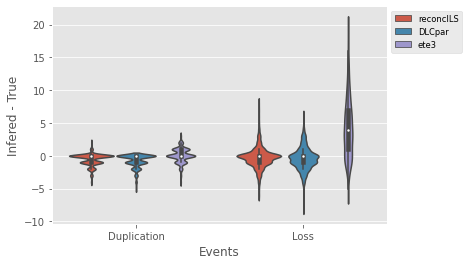

In [664]:
#ax =sns.boxplot(x="variable", y="value",hue="Algorithm", data=pd.melt(new, id_vars =['Algorithm']))
sns.violinplot(x="variable", y="value",hue="Algorithm", data=pd.melt(new, id_vars =['Algorithm']))

plt.xlabel("Events")
plt.legend(bbox_to_anchor=(1,1))
plt.ylabel("Infered - True")
plt.savefig('box_plot.jpg', dpi=500)
plt.savefig('large_tre_vio.png')


In [568]:
from folium.plugins import HeatMap
import folium
df1= df[['Replicate','Duplication']][(df.Process == 'Our_algorithm_ite')]
df2=df[['Replicate','Duplication']][(df.Process == 'Our_algorithm_')]

df1.set_index('Replicate',inplace=True)
df2.set_index('Replicate',inplace=True)

df2= df1.compare(df2).astype('category')
df2  = df2['Duplication']
CrosstabResult = pd.crosstab(index=df2['self'], columns=df2['other'])

ax1 = HeatMap(CrosstabResult, radius = 10, gradient={1000: 'blue', 3000: 'lime', 5000: 'red'})

plt.show()

ValueError: Can only compare identically-labeled DataFrame objects

In [36]:
df1

,Duplication
Replicate,
0,1
1,3
3,5
4,0
5,0
...,...
995,1
996,0
997,1


In [48]:
df1= df[['Replicate','Loss']][(df.Process == 'Our_algorithm')]
df2=df[['Replicate','Loss']][(df.Process == 'True Process')]

df1.set_index('Replicate',inplace=True)
df2.set_index('Replicate',inplace=True)

df2= df1.compare(df2).astype('category')
df2  = df2['Loss']
CrosstabResult = pd.crosstab(index=df2['self'], columns=df2['other'])
ax1 = sns.heatmap(CrosstabResult, cbar=0, linewidths=2,vmax=1, vmin=0, square=True, cmap='Blues')
plt.show()

ValueError: Can only compare identically-labeled DataFrame objects

In [351]:
df1= df[['Replicate','Loss']][(df.Process == 'Our_algorithm')]
df2=df[['Replicate','Loss']][(df.Process == 'DLCpar')]

df1.set_index('Replicate',inplace=True)
df2.set_index('Replicate',inplace=True)

df2= df1.compare(df2).astype('category')
df2  = df2['Loss']
CrosstabResult = pd.crosstab(index=df2['self'], columns=df2['other'])
ax1 = sns.heatmap(CrosstabResult, cbar=0, linewidths=2,vmax=1, vmin=0, square=True, cmap='Blues')
plt.show()

ValueError: Can only compare identically-labeled DataFrame objects

In [ ]:
df[['Replicate','Process','Duplication']][(df.Process == 'Our_algorithm')]

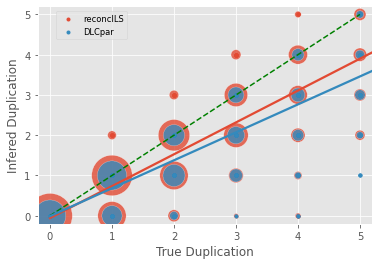

<Figure size 432x288 with 0 Axes>

In [665]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

result1 =pd.concat([True_Duplication['Duplication'],O_Duplication['Duplication']], ignore_index=True,axis=1)
result11=result1.groupby([0,1]).size().reset_index(name='Count')
result12 =pd.concat([True_Duplication['Duplication'],dlc_Duplication['Duplication']], ignore_index=True,axis=1)
result22=result12.groupby([0,1]).size().reset_index(name='Count')
#sns.lmplot(x=result1[0], y=result1[1], data=result1);
x = [0,1, 2, 3, 4, 5]
y = [0,1, 2, 3, 4, 5]

# Create the line
line = plt.plot(x, y, '--',color='g')

sns.scatterplot(data=result11, x=0, y=1, size="Count", legend=False, sizes=(20, 2000), alpha=0.8)
sns.scatterplot(data=result22, x=0, y=1, size="Count", legend=False, sizes=(10, 1000), alpha=0.8)

# show the graph

ax=sns.regplot(x=result1[0], y=result1[1], data=result1,marker=".", fit_reg=True, scatter_kws={'alpha':1}, ci=None, label='reconcILS')
ax=sns.regplot(x=result12[0], y=result12[1], data=result12, marker=".",fit_reg=True,scatter_kws={'alpha':1}, ci=None, label='DLCpar')




plt.xlabel("True Duplication")
plt.ylabel("Infered Duplication")
# Show the plot
ax.set_xlim(-0.2, 5.2)
ax.set_ylim(-0.2, 5.2)

plt.legend(bbox_to_anchor=(0.28,1))

plt.savefig('regex_dups_large.png', dpi=500)

plt.show()
plt.clf()

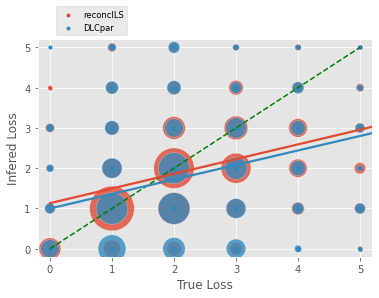

<Figure size 432x288 with 0 Axes>

In [666]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


result1 =pd.concat([TRUE_Loss['Loss'],O_Loss['Loss']], ignore_index=True,axis=1)
result11=result1.groupby([0,1]).size().reset_index(name='Count')

result12 =pd.concat([TRUE_Loss['Loss'],dlc_Loss['Loss']], ignore_index=True,axis=1)
#sns.lmplot(x=result1[0], y=result1[1], data=result1);
result22=result12.groupby([0,1]).size().reset_index(name='Count')
sns.scatterplot(data=result11, x=0, y=1, size="Count", legend=False, sizes=(20, 2000), alpha=0.8)
sns.scatterplot(data=result22, x=0, y=1, size="Count", legend=False, sizes=(10, 1000), alpha=0.8)
x = [0,1, 2, 3, 4, 5]
y = [0,1, 2, 3, 4, 5]

# Create the line
line = plt.plot(x, y, '--',color='g')
ax=sns.regplot(x=result1[0], y=result1[1], data=result1,marker=".", fit_reg=True, scatter_kws={'alpha':1}, ci=None, label='reconcILS')
ax=sns.regplot(x=result12[0], y=result12[1], data=result12, marker=".",fit_reg=True,scatter_kws={'alpha':1}, ci=None, label='DLCpar')



plt.xlabel("True Loss")
plt.ylabel("Infered Loss")
# Show the plot
ax.set_xlim(-0.2, 5.2)
ax.set_ylim(-0.2, 5.2)

plt.legend(bbox_to_anchor=(0.28,1))

plt.savefig('regex_loss_large.png', dpi=500)

plt.show()
plt.clf()

In [101]:
r =result1.astype('category')

In [102]:
r

,0,1
0,0,0
1,2,2
2,0,0
3,1,1
4,0,0
...,...,...
815,0,0
816,0,0
817,3,0
818,1,1


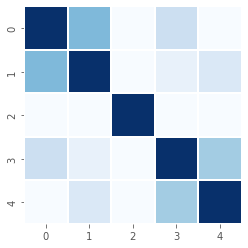

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(np.random.randn(50).reshape(10,5))
corr = df.corr()

ax1 = sns.heatmap(corr, cbar=0, linewidths=2,vmax=1, vmin=0, square=True, cmap='Blues')
plt.show()

In [104]:
np.array([list(result1[0]), list(result1[1])])

array([[0, 2, 0, ..., 3, 1, 0],
       [0, 2, 0, ..., 0, 1, 0]])

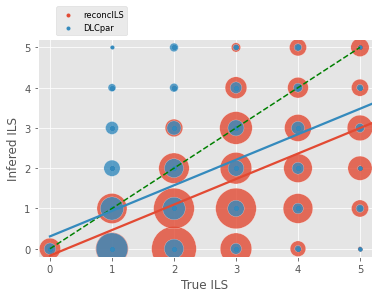

<Figure size 432x288 with 0 Axes>

In [667]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt






result1 =pd.concat([TRUE_NNI['NNI'],O_NNI['NNI']], ignore_index=True,axis=1)
result11=result1.groupby([0,1]).size().reset_index(name='Count')
result12 =pd.concat([True_DLCILS['DLCILS'],dlc_DLCILS['DLCILS']], ignore_index=True,axis=1)
#sns.lmplot(x=result1[0], y=result1[1], data=result1);
result22=result12.groupby([0,1]).size().reset_index(name='Count')
x = [0,1, 2, 3, 4, 5]
y = [0,1, 2, 3, 4, 5]

# Create the line
line = plt.plot(x, y, '--',color='g')
#sns.lmplot(x=result1[0], y=result1[1], data=result1);
sns.scatterplot(data=result11, x=0, y=1, size="Count", legend=False, sizes=(20, 2000), alpha=0.8)
sns.scatterplot(data=result22, x=0, y=1, size="Count", legend=False, sizes=(10, 1000), alpha=0.8)

ax=sns.regplot(x=result1[0], y=result1[1], data=result1,marker=".", fit_reg=True, scatter_kws={'alpha':1}, ci=None, label='reconcILS')
ax=sns.regplot(x=result12[0], y=result12[1], data=result12, marker=".",fit_reg=True,scatter_kws={'alpha':1}, ci=None, label='DLCpar')



plt.xlabel("True ILS")
plt.ylabel("Infered ILS")
# Show the plot
ax.set_xlim(-0.2, 5.2)
ax.set_ylim(-0.2, 5.2)

plt.legend(bbox_to_anchor=(0.28,1))

plt.savefig('regex_NNI_large.png', dpi=500)

plt.show()
plt.clf()

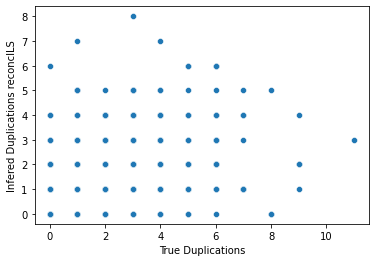

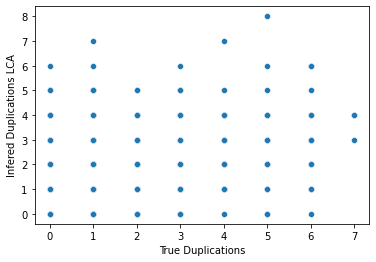

In [223]:
import seaborn as sns



result1 =pd.concat([TRUE_Loss,O_Loss.rename(columns={'b':'a'})], ignore_index=True,axis=1)
result2 =pd.concat([TRUE_Loss,ETE3_Loss.rename(columns={'b':'a'})], ignore_index=True,axis=1)
sns.scatterplot(data=result1,x=1,y=0)
plt.xlabel("True Duplications")
plt.ylabel("Infered Duplications reconcILS")
# Show the plot
plt.show()
plt.clf()

sns.scatterplot(data=result2,x=1,y=0)
plt.xlabel("True Duplications")
plt.ylabel("Infered Duplications LCA")
plt.show()

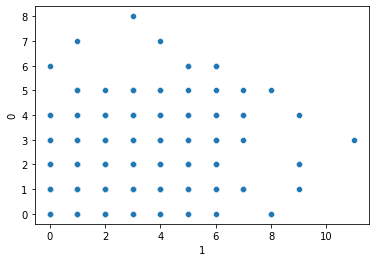

In [224]:
import seaborn as sns



result =pd.concat([TRUE_Loss,O_Loss.rename(columns={'b':'a'})], ignore_index=True,axis=1)
sns.scatterplot(data=result,x=1,y=0)
 
# Show the plot
plt.show()

In [507]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Loss']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "DLCpar")]['Loss']),columns=['NNI']))

In [508]:
rho

0.32164680480657243

In [509]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Loss']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "Our_algorithm_ite")]['Loss']),columns=['NNI']))

In [510]:
rho

0.439492128017255

In [511]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Duplication']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "DLCpar")]['Duplication']),columns=['NNI']))

In [512]:
rho

0.8984672769991422

In [513]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Duplication']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "Our_algorithm_ite")]['Duplication']),columns=['NNI']))

In [514]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Duplication']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "Our_algorithm_ite")]['Duplication']),columns=['NNI']))

In [515]:
rho

0.9052944822200548

In [516]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['DLCILS']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "DLCpar")]['DLCILS']),columns=['NNI']))

In [517]:
rho

0.5368632558127377

In [518]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['NNI']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "Our_algorithm_recu")]['NNI']),columns=['NNI']))

In [519]:
rho

0.6450177597012016